In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models
import math
import numpy as np
import matplotlib.pyplot as plt


# 1&2. Download images and re-scale.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


#3. Plot training images and print labels.

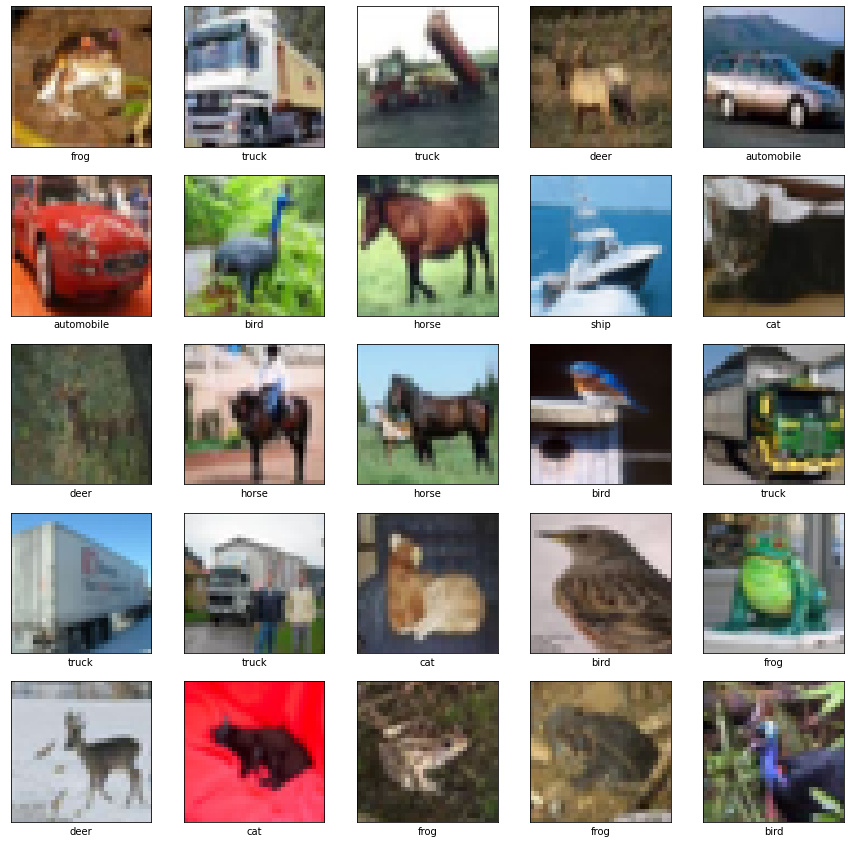

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#4. Construct a CNN.

In [ ]:
def model_cnn(output_dim, l2reg):
  model = keras.Sequential()

  model.add(layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer = regularizers.l2(l2reg), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer = regularizers.l2(l2reg), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(256, (3, 3), padding='valid', kernel_regularizer = regularizers.l2(l2reg), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, kernel_regularizer = regularizers.l2(l2reg), activation='relu'))
  model.add(layers.Dense(output_dim, activation=None, kernel_regularizer = regularizers.l2(l2reg)))

  return model

#5. Train network.

In [ ]:
# Train this network
model10 = model_cnn(10, 1e-5)
model10.compile(optimizer = 'adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model10.fit(train_images, train_labels, batch_size=64, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
782/782 [==============================] - 263s 335ms/step - loss: 1.4013 - accuracy: 0.4949 - val_loss: 1.1276 - val_accuracy: 0.6124
Epoch 2/20
782/782 [==============================] - 262s 335ms/step - loss: 0.9939 - accuracy: 0.6521 - val_loss: 1.0331 - val_accuracy: 0.6469
Epoch 3/20
782/782 [==============================] - 261s 334ms/step - loss: 0.8136 - accuracy: 0.7176 - val_loss: 0.8265 - val_accuracy: 0.7158
Epoch 4/20
782/782 [==============================] - 261s 334ms/step - loss: 0.6964 - accuracy: 0.7610 - val_loss: 0.7695 - val_accuracy: 0.7379
Epoch 5/20
782/782 [==============================] - 259s 331ms/step - loss: 0.5953 - accuracy: 0.7989 - val_loss: 0.7515 - val_accuracy: 0.7516
Epoch 6/20
782/782 [==============================] - 257s 329ms/step - loss: 0.5149 - accuracy: 0.8283 - val_loss: 0.7595 - val_accuracy: 0.7528
Epoch 7/20
782/782 [==============================] - 257s 329ms/step - loss: 0.4382 - accuracy: 0.8558 - val_loss: 0.7806 -

#6. Plot accuracy as a function of number of epoch.

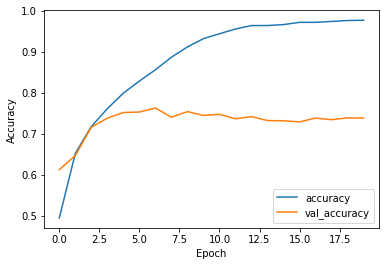

In [ ]:
# Visualization of accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#7. Plot test images and their predicted class names.



In [ ]:
# Predict class name for each image
test_loss, test_acc = model10.evaluate(test_images,  test_labels)
test_class = model10(test_images[0:25])
index = tf.math.argmax(test_class,axis=1)

313/313 [==============================] - 12s 40ms/step - loss: 1.7430 - accuracy: 0.7380


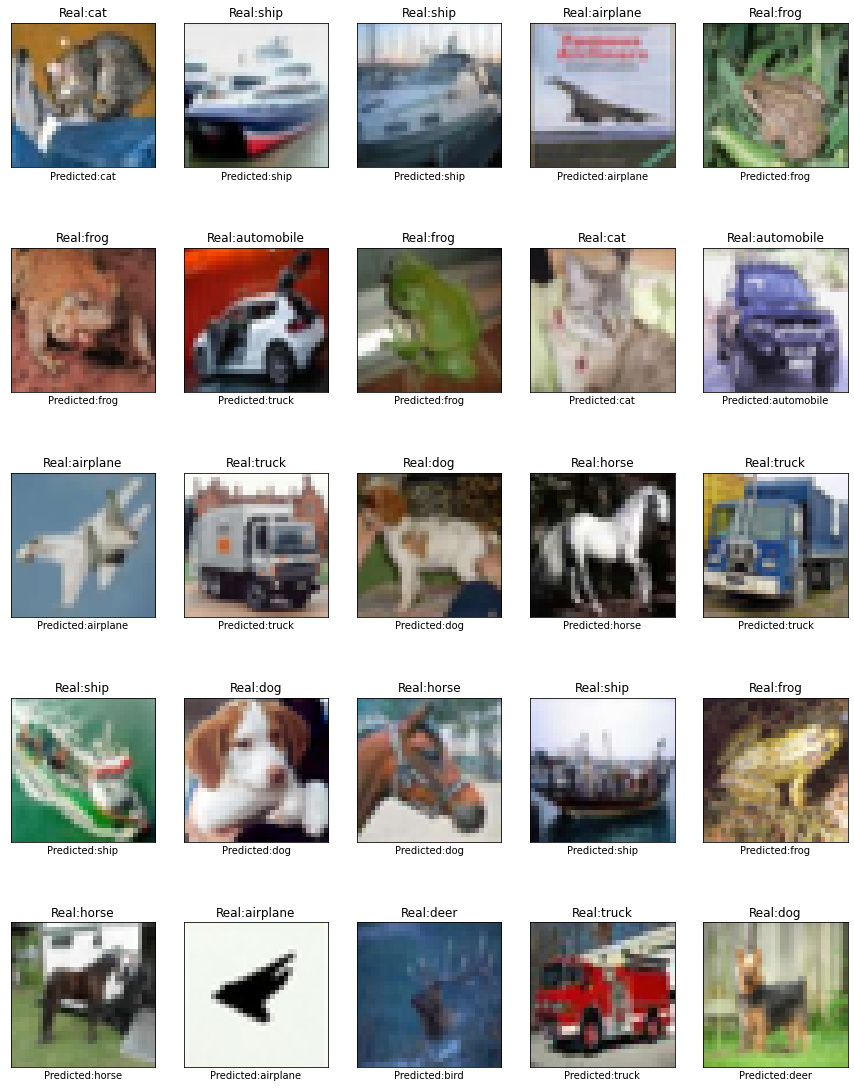

The number of wrong predictions: 4


In [ ]:
# Visualization of test images and their predicted classes
wrong_pred_num = 0
plt.figure(figsize=(15,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.title('Real:{}'.format(class_names[test_labels[i][0]]))
    plt.xlabel('Predicted:{}'.format( class_names[index[i]] ) )
    if abs(test_labels[i][0]- index[i])>0:
      wrong_pred_num = wrong_pred_num + 1
plt.show()
print('The number of wrong predictions:', wrong_pred_num)

The number of wrong predictions is different for each run. The above saved run results show 4 wrong predictions.

#8. Extract learned filters from the first convolutional layer.

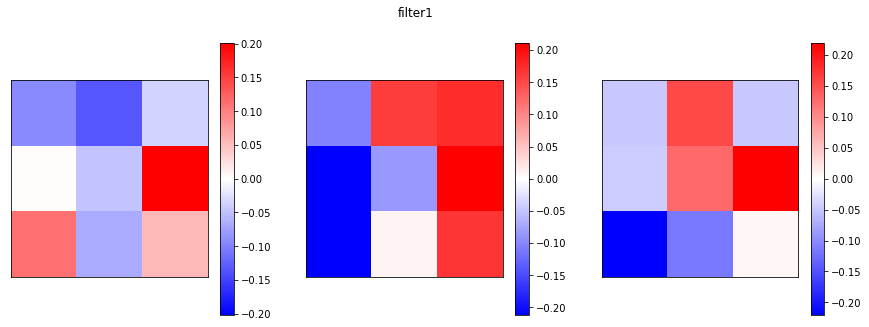

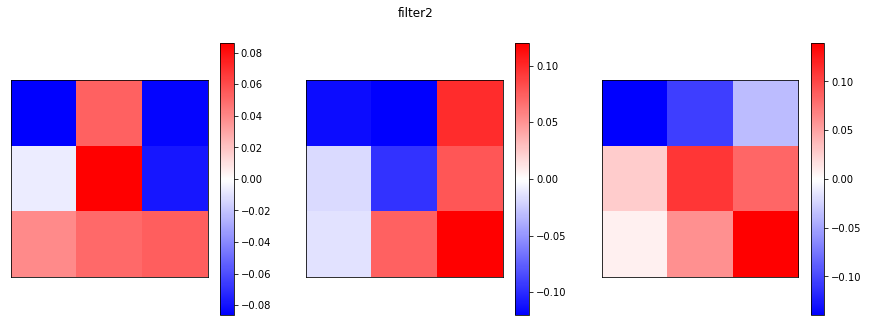

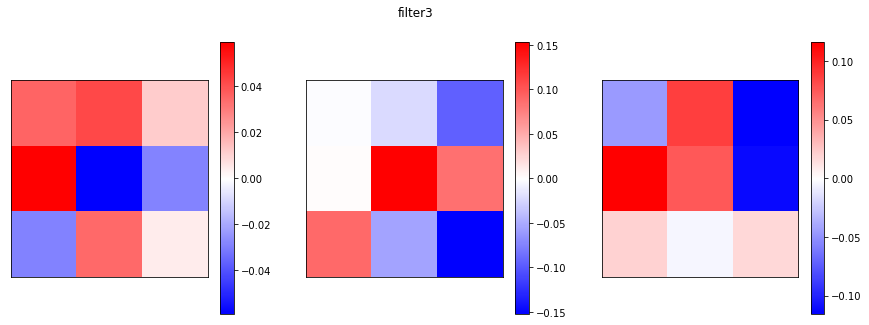

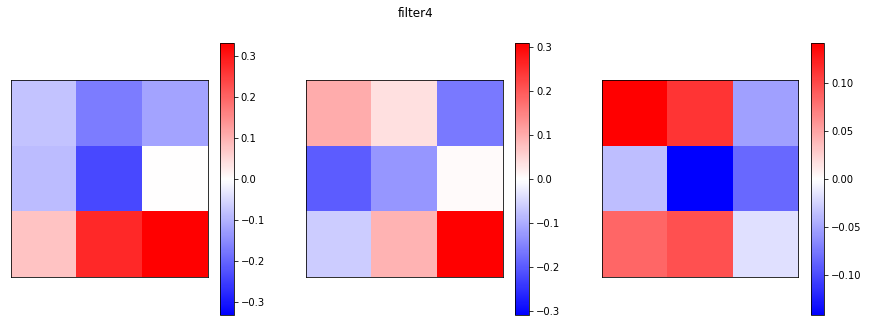

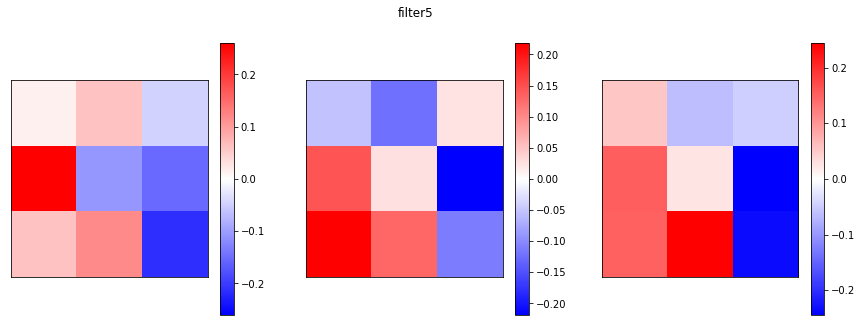

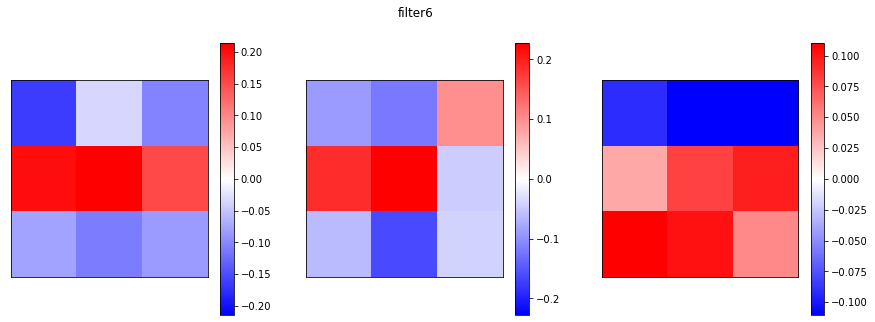

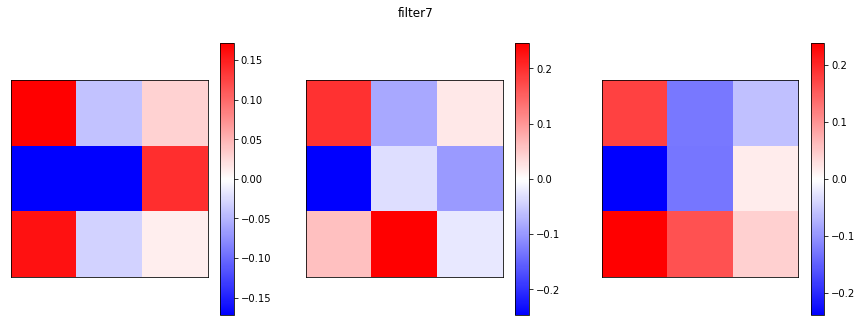

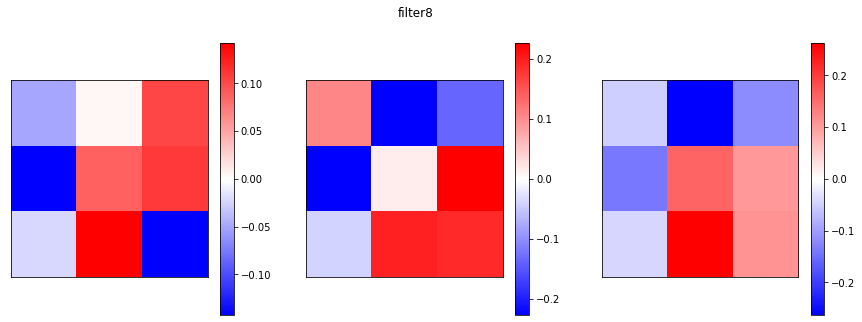

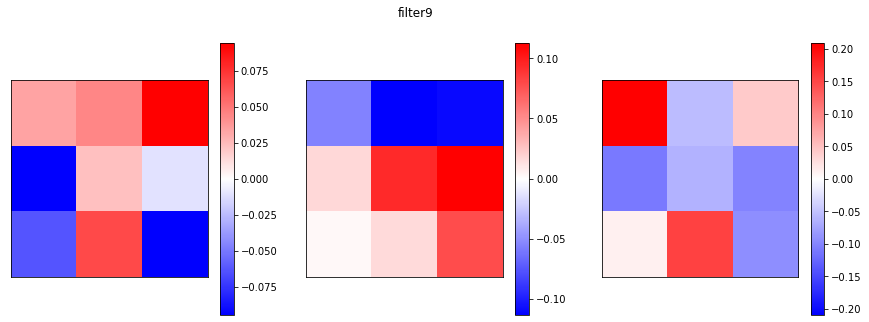

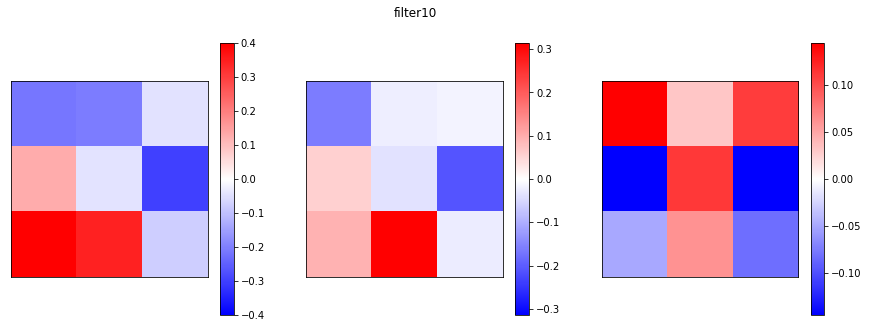

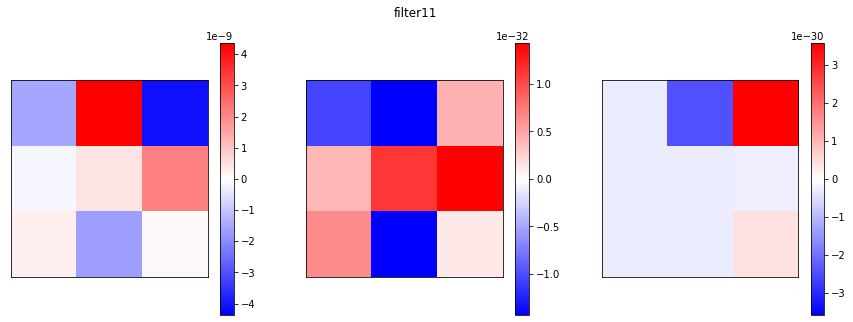

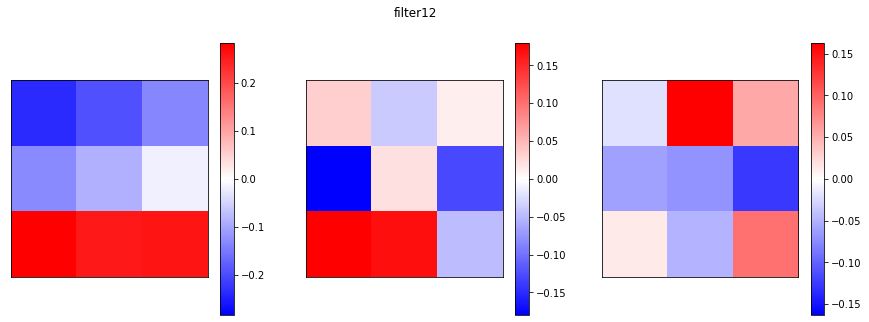

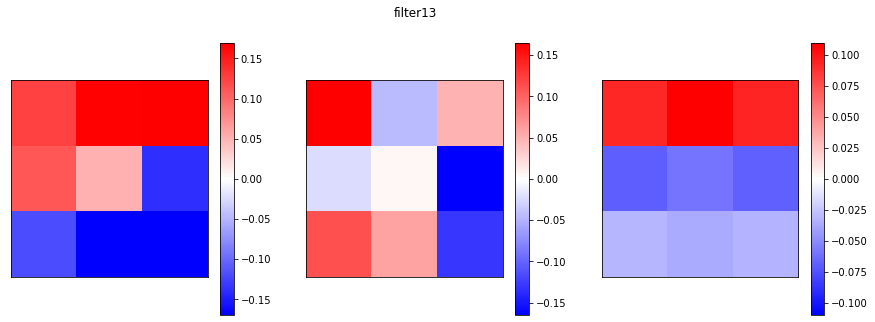

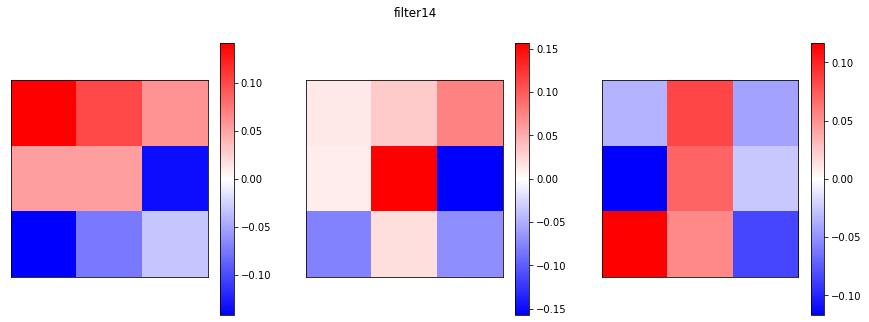

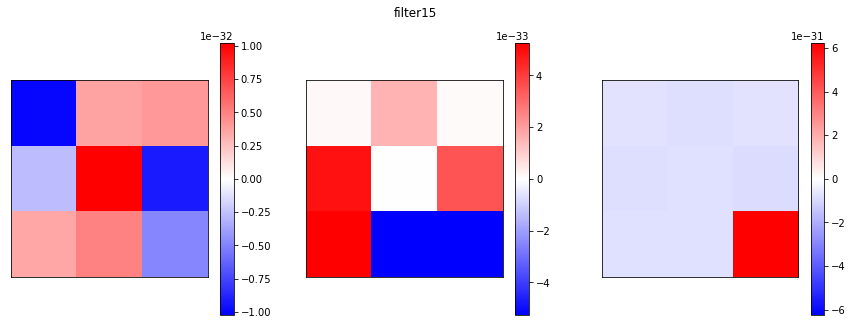

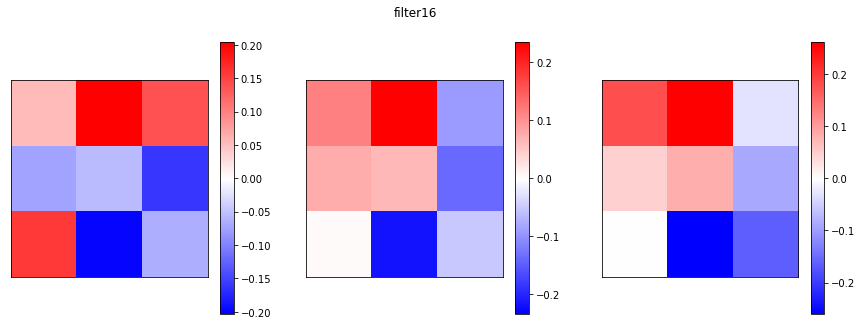

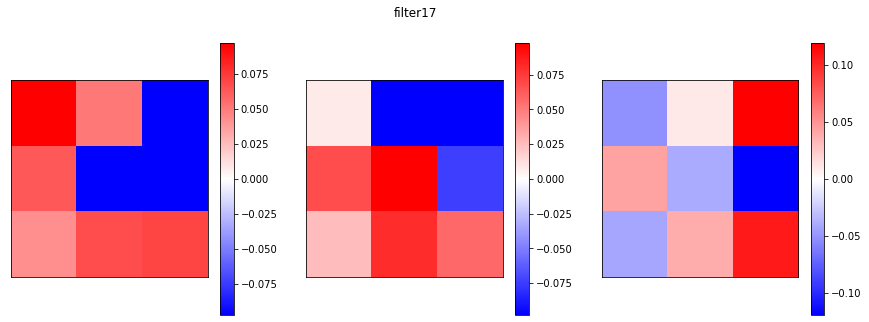

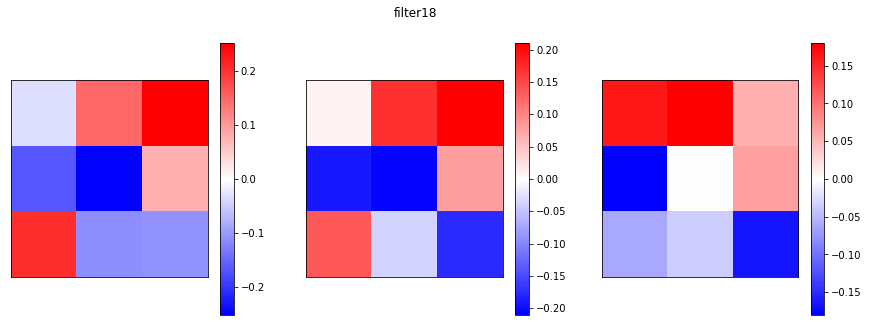

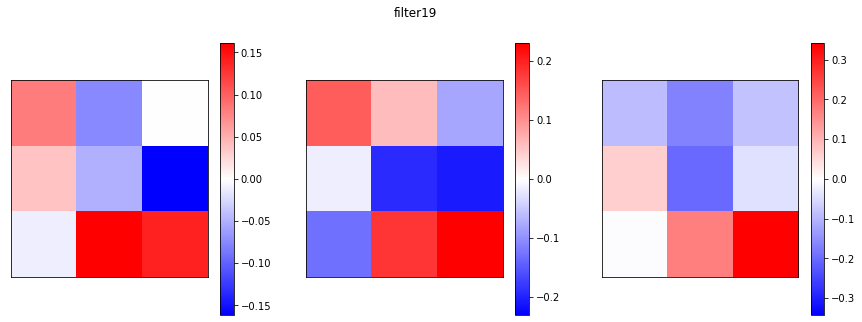

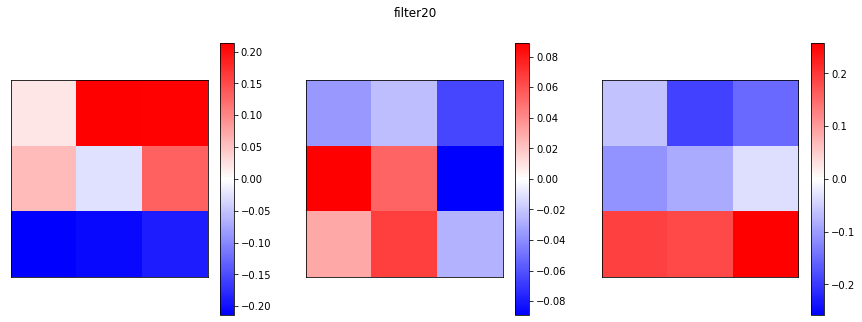

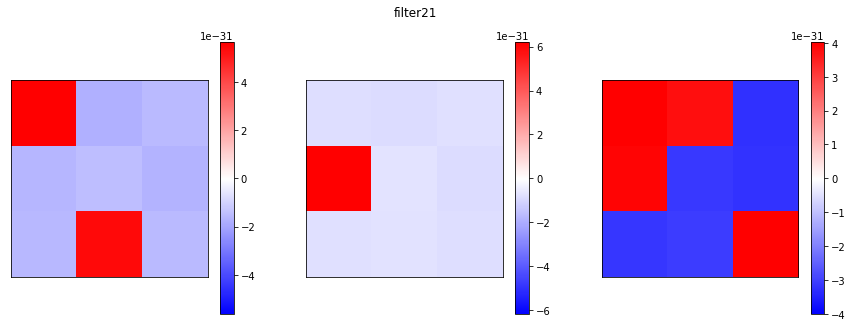

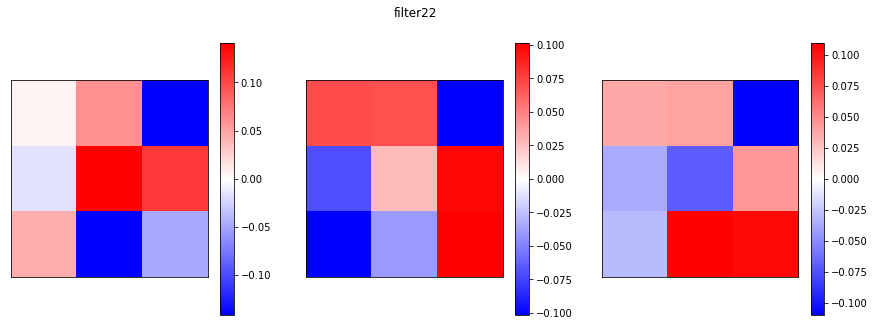

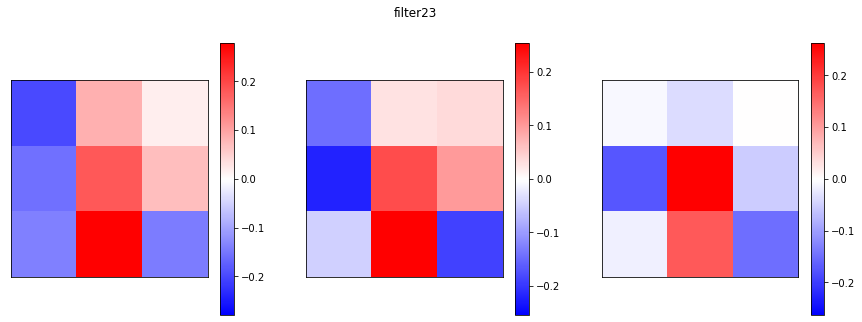

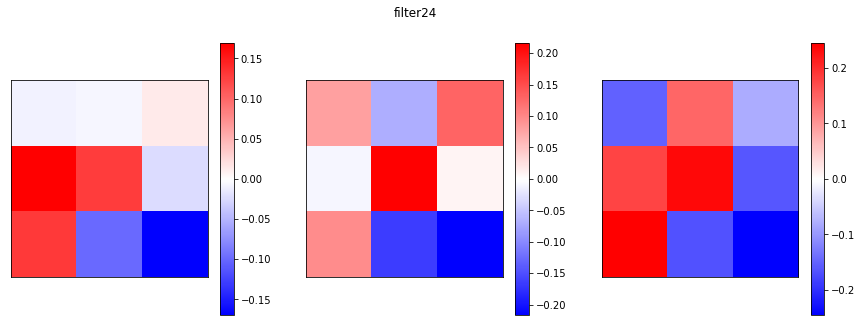

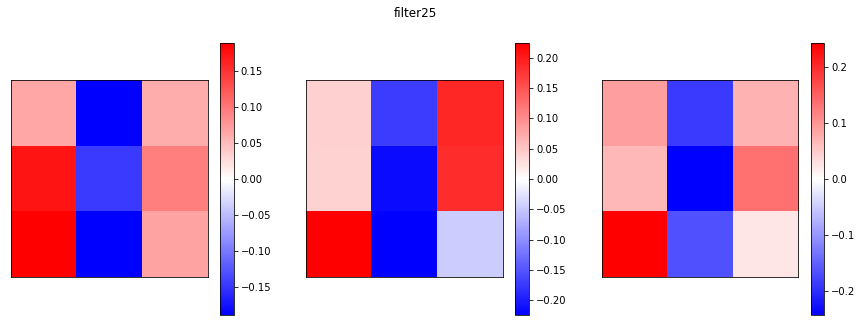

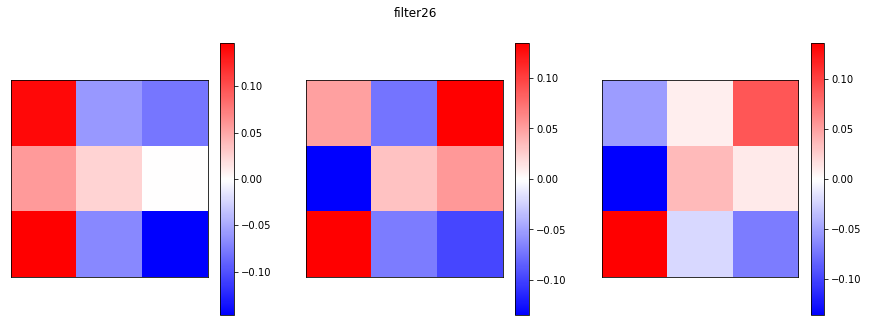

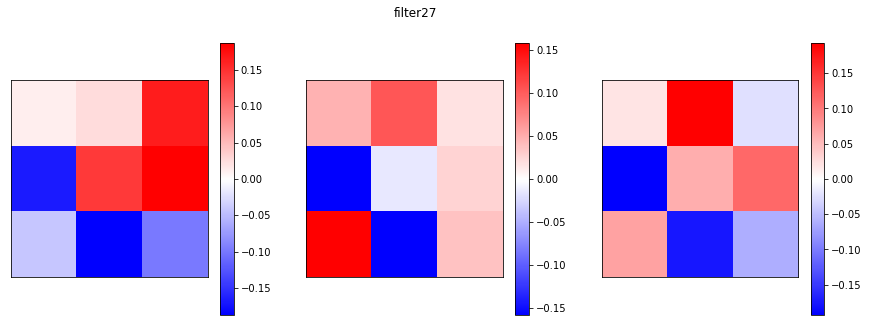

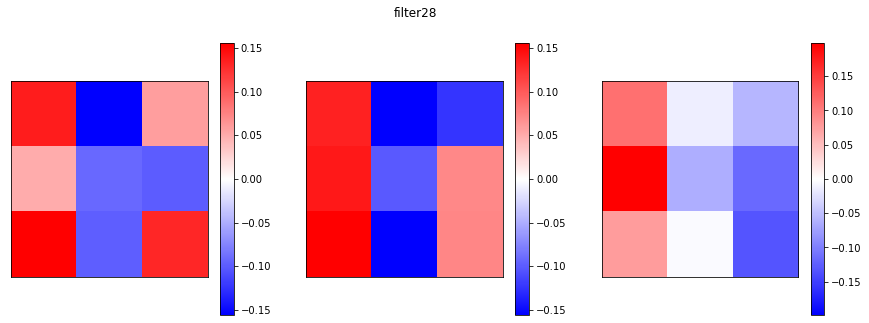

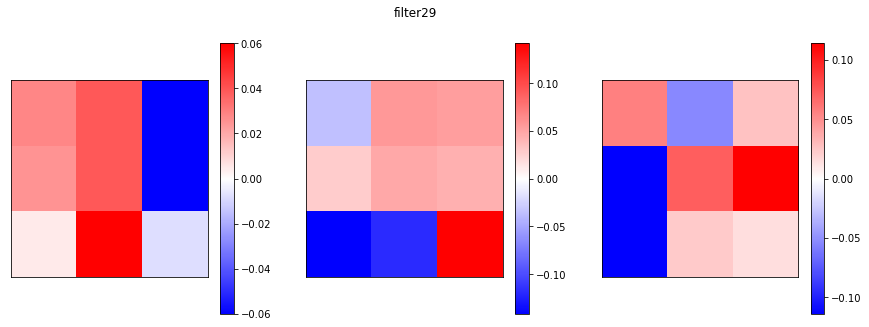

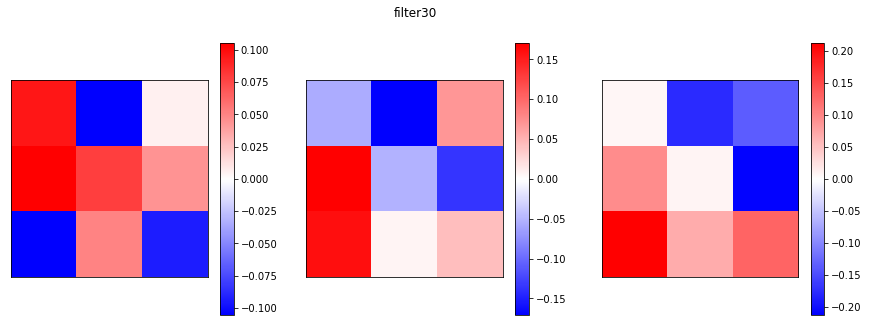

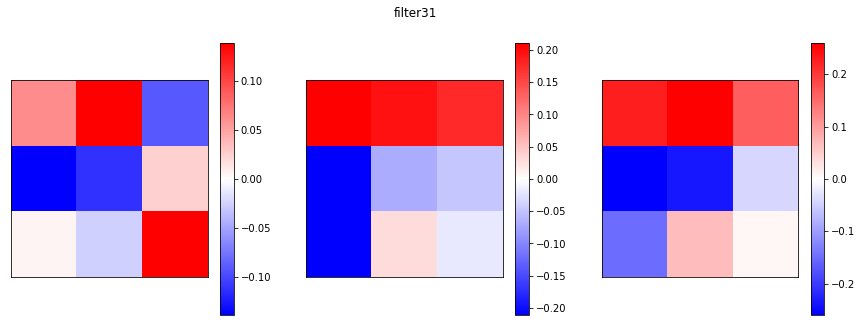

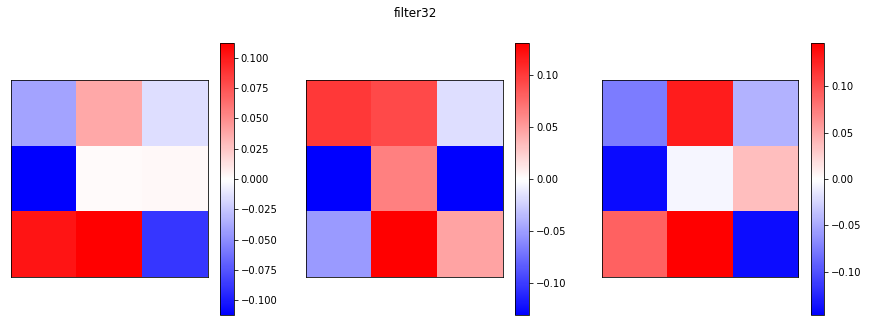

In [ ]:
# visualization of filter in the first convolutional layer
layer = model10.layers[0]
weights, bias = layer.get_weights()
vari_weights = weights

# normalize filter values between 0 and 1 for visualization
for nf in range(32):
  for nc in range(3):
    vari_weights[:,:,nc,nf] = weights[:,:,nc,nf] - np.mean(weights[:,:,nc,nf])

# visualize the filter
for i in range(32):
    plt.figure(figsize=(15,5))
    plt.suptitle('filter{}'.format(i+1))
    plt.set_cmap('bwr')
    #get the filters
    filt = vari_weights[:,:,:, i]
    #plotting each of the channel, color image RGB channels
    for j in range(3):
        plt.subplot(1,3,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(filt[:,:, j])
        plt.colorbar()
        plt.clim(-filt[:,:, j].max(), filt[:,:, j].max())
    plt.show()

#9. Identify the filter that approximate first and second derivatives.

Notice that filter 28 image 3 shows a first derivative approximation along negative horizontal direction, because the maganitude shown by colormap monotonically decreases horizontally. Recall the coefficients in central difference for first derivative are (-1, 1). The color map shows red, white, blue sequentially from left to right, which approximates negative first derivative.

The filter 25 shows approximation of second derivative along horizontal direction, because the maganitude shown by colormap is the smallest in the middle column and it is relative large in left and right columns. Recall the coefficients in central difference for second derivative are (1, -2, 1). For example, image 1 shows color red(column 1), blue(column 2), red(column 3), which represents positive-negative-positive trend horizontally. Thus, this filter approximates second derivative.

The visualization of picking one image for an example of each case is shown below.

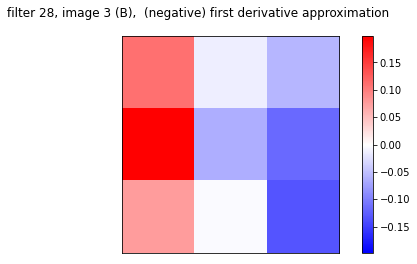

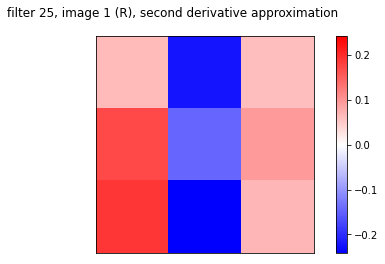

In [ ]:
# Visualize derivatives approximation
plt.figure(figsize=(8,4))
plt.suptitle('filter 28, image 3 (B),  (negative) first derivative approximation')
plt.set_cmap('bwr')
filt = vari_weights[:,:,:, 27]
plt.xticks([])
plt.yticks([])
plt.imshow(filt[:,:, 2])
plt.colorbar()
plt.clim(-filt[:,:, j].max(), filt[:,:, j].max())
plt.show()

plt.figure(figsize=(8,4))
plt.suptitle('filter 25, image 1 (R), second derivative approximation')
plt.set_cmap('bwr')
filt = vari_weights[:,:,:, 24]
plt.xticks([])
plt.yticks([])
plt.imshow(filt[:,:, 0])
plt.colorbar()
plt.clim(-filt[:,:, j].max(), filt[:,:, j].max())
plt.show()